# <font color=black>Sentiment Analysis of Women's E-Commerce Clothing Reviews</font>

## <font color=black>1. Introduction</font>

This is an Sentiment analysis of Women’s Clothing E-Commerce dataset revolving around the reviews written by customers.
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

## <font color=black>2. Analysis</font>
First, let's import packages and load the data.

In [2]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import itertools
import re
import nltk 
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud

clothing = pd.read_csv(r'C:\Users\Igor\Womens Clothing Reviews.csv')       
print("The dataframe has {} rows and {} columns".format(clothing.shape[0], clothing.shape[1]))
clothing.head(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Igor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The dataframe has 23486 rows and 11 columns


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


As we see, the dataset has 11 columns. In this analysis, I will focus just on some of them: "Review Text", "Rating", "Department Name", "Class Name" since they are the most important and contain the main information.
Next, I want to know how many null values the dataset has.

In [3]:
clothing.drop_duplicates(inplace=True)
display(clothing.isnull().sum())

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

At the next step, it would be useful to find out the distribution of customers' age.

Text(0.5,1,'Distribution of Age')

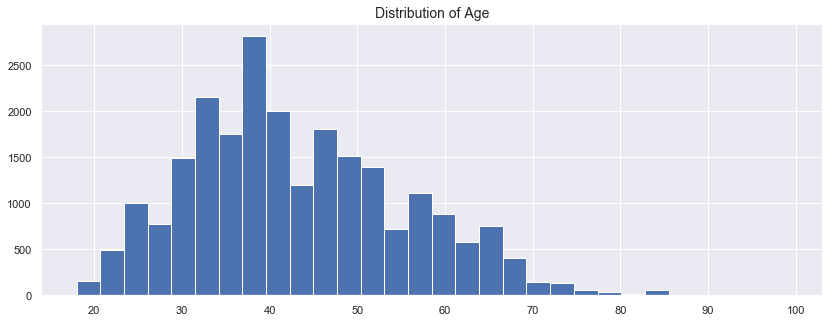

In [4]:
plt.figure(figsize= (14,5))
sns.set(style="darkgrid")
plt.hist(clothing['Age'], bins=30)
plt.title("Distribution of Age", fontsize=14)

**1st result:** Our customers are 30-45 years old mostly. So company's target marketing campaign and service should take into account their preferences. 

Next, we will examine how much positive and negative rating we have overall. 

Text(0.5,1,'Distribution of Ratings')

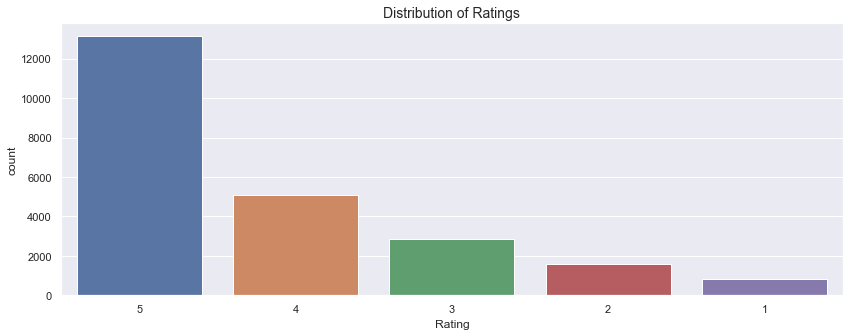

In [5]:
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Rating', data=clothing, order = clothing['Rating'].value_counts().index)
plt.title("Distribution of Ratings", fontsize=14)

**2nd result:** The largest part of the reviews are postive with 5 and 4 scores. The number of reviews with 2 and 1 scores are relatively small.

Next, I will analyze the rating distribution per department. It will help to find out wheather the store has a department with negative reviews to suggest some ways to improve it or just delete this department. 

col_0,Rating_mean
Department Name,
Bottoms,4.288760
Dresses,4.150815
Intimate,4.280115
Jackets,4.264535
Tops,4.172239
Trend,3.815126


(3.6, 4.4)

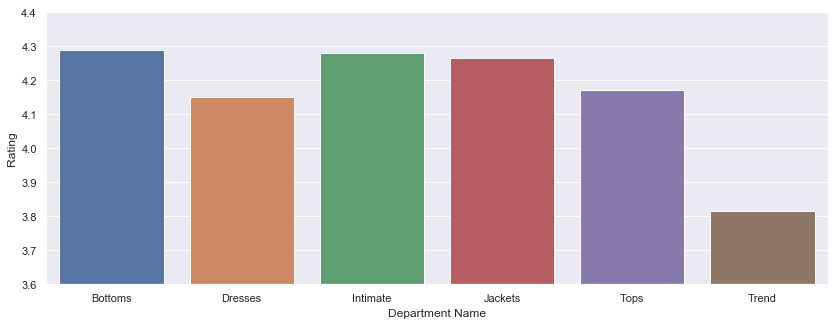

In [5]:
clothing_crosstab = pd.crosstab(index=clothing['Department Name'], columns='Rating_mean', values=clothing['Rating'], aggfunc=np.mean)
display(clothing_crosstab)

plt.figure(figsize= (14,5))
sns.set(style="darkgrid")
rating_deparment = clothing.groupby('Department Name', as_index = False).mean()
sns.barplot(x = 'Department Name', y = 'Rating', data = rating_deparment)
plt.ylim(3.6, 4.4)

**3rd result:** All departments have pretty similar ratings from 4.1 to 4.3. Trend clothing department has a little lower rating with 3.8. 

Next, I'm going to find out the number of reviews per each department.

Text(0.5,0,'Department')

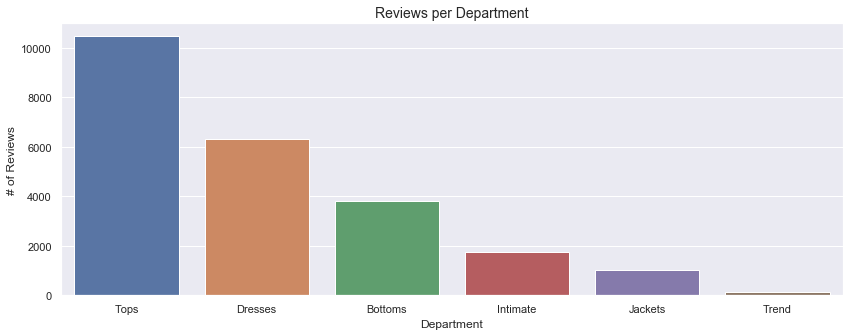

In [6]:
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Department Name', data=clothing, order = clothing['Department Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
plt.ylabel("# of Reviews", fontsize=12)
plt.xlabel("Department", fontsize=12)

**4th result:** The largest part of reviews are in the Tops and Dresses departments. Trend and Jackets departments have small number of reviews. It might be caused the fact that the store does not have a wide range of these clothing.

Next, I want to find out some particular words associated with positive (4-5 scores) and negative ratings (1-2 scores). It will help to understand what customers think about their purchases.

In [51]:
import re
import nltk 
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud

def clean_data(text):
    letters_only = re.sub("[^a-zA-Z]", " ", str(text)) 
    words = letters_only.lower().split()                            
    return( " ".join( words ))

stopwords = stopwords.words('english')
stopwords_new = ['would','skirt', 'blouse','dress','sweater', 'shirt','bottom', 'pant', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse']
stopwords.extend(stopwords_new)

def create_cloud(rating):
    x= [i for i in rating]
    y= ' '.join(x)
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= stopwords).generate(y)
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Igor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


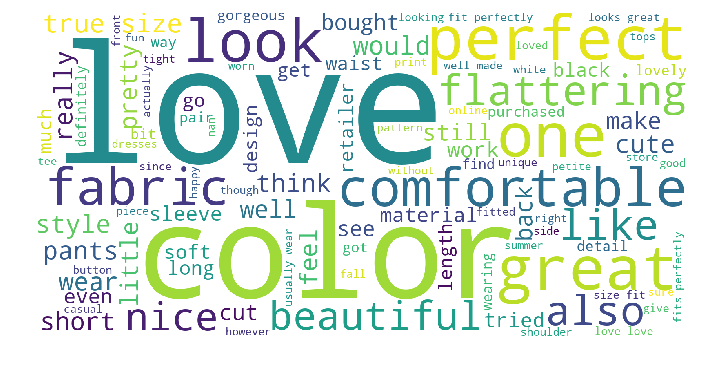

In [45]:
rating5= clothing[clothing['Rating']==5]['Review Text'].apply(clean_data)
create_cloud(rating5)

**Top words for 5-score Rating**
- love
- color
- perfect
- great
- comfortable

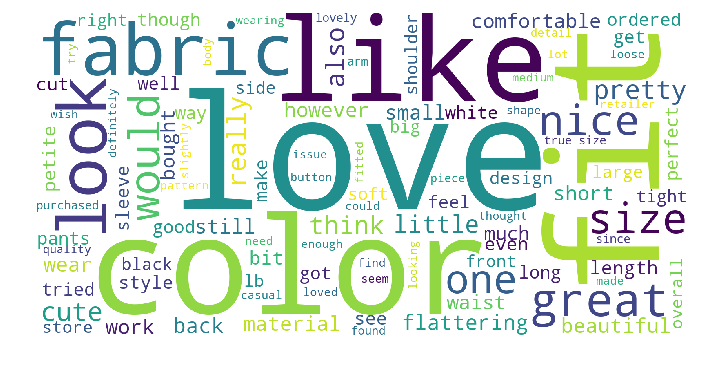

In [48]:
rating4= clothing[clothing['Rating']==4]['Review Text'].apply(clean_data)
create_cloud(rating4)

**Top words for 4-score Rating**
- love
- like
- color
- fit
- great

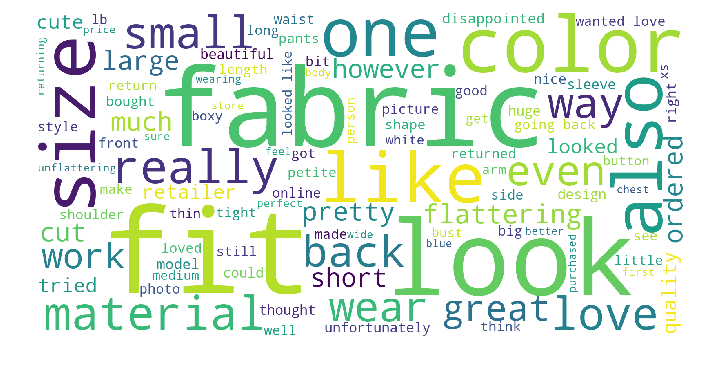

In [52]:
rating2= clothing[clothing['Rating']==2]['Review Text'].apply(clean_data)
create_cloud(rating2)

**Top words for 2-score Rating**
- fabric
- look
- color
- fit

In [1]:
rating1= clothing[clothing['Rating']==1]['Review Text'].apply(clean_data)
create_cloud(rating1)

NameError: name 'clothing' is not defined

**Top words for 1-score Rating**
- fabric
- color
- size
- look

As we see, the words as color and size are the most popular among all ratings. So people write negative reviews in case clothing doesn't fit them or they are not satisfied with color that is different from a photo on a web-site.

## <font color=black>3. Conclusion</font>

Some results of our analysis:
1.  **Fact:** Our customers are 30-45 years old mostly. 

    **Next Actions for the company:** The company's target marketing campaign and service should take into account preferences of middle-aged females or make some special deals for them.


2. The largest part of the reviews are postive with 5 and 4 scores. The number of reviews with 2 and 1 scores are relatively small.


3. **Fact#1:** The largest part of reviews are in the Tops and Dresses departments. Trend and Jackets departments have small number of reviews. It might be caused the fact that the store does not have a wide range of these clothing. 

   **Fact#2:** All departments have pretty similar ratings from 4.1 to 4.3. Trend clothing department has a little lower rating with 3.8. 
   
   **Next Actions for the company:** Need more information about the Trend department. It might be useful to know reasons why the company does not invest in it more for or still run it.


4. **Fact:** People write negative reviews in case clothing doesn't fit them or they are not satisfied with color that is different from a photo on a web-site. 

    **Next Actions for the company:** The company should add some size description of these items and change photos on the web-site to keep real color.